<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_final_amostra_07_set_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 11.6 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 464 (delta 102), reused 4 (delta 3), pack-reused 250
Receiving objects: 100% (464/464), 166.12 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[2] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 19.14 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     198  134.034363  137.265884  ...  127.490662  136.614410  144.750931
1     161   28.655954   28.221174  ...    8.270321    7.741022    7.608696
2     114   84.064018   79.719292  ...  134.701141  133.116333  132.822723
3     191  125.372086  119.136894  ...   81.289879   82.203651   82.527977
4     116  195.925079  211.775253  ...  114.219971  117.461357  120.033295
5     143  166.455048  169.940186  ...  115.729721  113.477280  122.339142
6     161    0.264650    0.034026  ...  121.446129  117.463150  114.041595
7     161   84.085075   55.843102  ...    8.081285    8.398867    8.478261
8     181  116.788414  120.419250  ...   69.469101   27.926346   36.522053
9     191  136.704681  139.203995  ...   92.697632   90.647926   91.195015
10    149   49.917709   59.215755  ...  119.587555  125.237915  127.361969
11    183   46.731556   48.901222  ...    7.036580    7.590910    7.608469
12    172   75.073013   7

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 151ms/step - loss: 0.5774 - accuracy: 0.7609 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 130ms/step - loss: 0.2710 - accuracy: 0.8746 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 129ms/step - loss: 0.1922 - accuracy: 0.9067 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 129ms/step - loss: 0.1474 - accuracy: 0.9388 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1136 - accuracy: 0.9592 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 133ms/step - loss: 0.0769 - accuracy: 0.9767 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0496 - accuracy: 0.9796 - val_loss: 0.6925 - val_accuracy: 0.5102

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)

In [20]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']
  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        62  10
1         1  74


In [21]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        72
           1       0.88      0.99      0.93        75

    accuracy                           0.93       147
   macro avg       0.93      0.92      0.92       147
weighted avg       0.93      0.93      0.92       147



In [22]:
#pred_test

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[2] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   115.0   96.093842   95.426918  ...   84.199539   83.373306   82.275833
1   188.0   80.697586   80.514702  ...   59.295155   57.668179   54.706650
2   183.0  146.967484  154.082062  ...  146.333359  147.932983  148.330978
3   189.0   87.762688   93.455421  ...  119.716049  124.367638  128.422516
4   171.0  147.521255  160.530609  ...   95.571266   83.656960   76.451935
5   178.0   97.999374   84.530113  ...   61.699032   65.814552   88.952782
6   140.0  109.479996  108.320000  ...  200.800003  199.839996  203.800003
7   135.0   61.692894   59.511604  ...    0.000000    0.000000    0.000000
8   152.0   91.831718   91.170357  ...  108.120499  104.918976  103.397499
9   117.0  147.934982  148.922485  ...  114.103661  112.123238  107.578415
10  150.0  117.228798  103.165497  ...  113.361069  107.792892  106.836800
11  190.0  138.991119  144.054413  ...  156.194229  159.975159  159.149918
12  159.0   73.023491   7

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 717, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (476/476), done.
remote: Total 717 (delta 304), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (717/717), 5.80 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (441/441), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra7.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 464 (delta 102), reused 4 (delta 3), pack-reused 250
Receiving objects: 100% (464/464), 166.12 MiB | 26.68 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  1.387
1           2  1.626
2           3  1.336


In [27]:
PSD_new.shape

(102, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,115.0,96.093842,95.426918,93.942749,92.670609,92.734283,92.247169,88.010353,87.639687,84.642265,83.812317,82.680595,81.216553,78.838333,78.270317,76.605972,74.957733,80.938072,85.006729,91.435608,107.377838,125.787361,134.620178,137.569748,135.910904,133.979355,131.776108,127.526413,125.368538,96.820641,98.590012,99.057007,96.816711,93.437805,91.867294,85.782005,81.151230,81.570961,81.176254,80.003853,...,116.835602,115.075302,110.569756,96.195755,89.594330,90.364227,90.430466,89.381683,87.519463,86.834099,86.316055,85.152359,155.566711,153.221008,146.309402,116.527176,103.550087,106.486649,108.648918,109.465248,109.687622,109.142761,109.387825,112.089676,113.443626,113.870544,115.424042,113.249374,108.850883,103.528542,97.900261,90.278633,88.207108,88.478256,88.980789,88.248985,86.746536,84.199539,83.373306,82.275833
1,188.0,80.697586,80.514702,79.857399,77.430054,113.011765,138.821625,135.437286,123.810768,116.729736,114.435486,113.796738,114.867813,119.852417,127.047974,133.988678,140.865555,145.954742,154.988663,162.173370,168.009491,166.521484,156.706650,85.479858,78.024437,89.156181,97.187408,98.731094,99.920776,81.214111,82.429604,83.415115,79.687187,104.478951,132.251236,128.864639,124.540512,121.434586,122.021729,122.947929,...,94.139885,70.661377,47.642822,45.698505,48.630146,50.650517,53.714798,54.915337,58.211864,58.679935,55.635582,54.906292,156.756882,158.076050,160.020355,162.378906,166.004517,168.139420,171.636032,173.105927,192.468994,163.751907,98.518333,102.583061,101.322311,103.980537,105.161621,109.290176,110.533722,101.990494,71.367134,48.929379,49.115437,51.761883,52.888184,54.258484,56.354462,59.295155,57.668179,54.706650
2,183.0,146.967484,154.082062,160.773941,165.516251,172.210342,172.858780,171.472748,169.219315,149.140762,99.472809,87.141777,87.676582,87.781242,93.395805,111.680710,124.939148,134.176178,141.091812,140.148865,140.146698,144.232605,152.467682,144.888504,139.561905,140.140442,137.153366,132.851334,132.558456,142.057678,149.614441,156.474976,164.608749,175.116730,175.083405,175.911179,176.755676,168.775162,138.567795,85.625755,...,176.679688,178.081711,173.441452,164.809311,147.254684,135.623642,134.531906,138.001770,141.251495,142.189621,139.907837,142.203751,121.489487,156.603271,171.880600,207.452682,233.219055,225.079956,206.567001,199.207565,176.551147,173.049042,175.521194,175.880173,178.310989,180.268417,179.156174,176.357880,176.191467,180.335037,183.465576,188.133698,187.523727,183.782440,175.415375,156.100052,145.020477,146.333359,147.932983,148.330978
3,189.0,87.762688,93.455421,103.034294,128.411530,76.382713,40.854599,83.451309,103.031555,102.142670,94.153633,85.847740,82.887512,82.807953,83.537720,82.310013,85.012344,88.063103,95.410149,92.842262,89.045273,94.570656,110.820305,100.610420,95.913582,94.650208,91.912216,83.156372,76.854599,88.401924,93.869690,103.711929,87.909470,44.209877,45.647465,90.452667,100.518524,99.615913,96.625519,93.175575,...,108.216736,120.666672,121.021942,117.540482,114.596710,112.676254,113.086411,116.787384,120.599457,124.541847,125.786003,121.478745,161.936890,162.342941,165.042542,171.736633,190.220856,204.102875,189.211243,70.155006,70.388206,72.201645,69.310013,69.170090,66.218109,84.840881,110.314133,119.861450,126.746239,130.757202,129.935532,129.839508,124.840881,114.015091,111.486961,113.530869,116.432106,119.716049,124.367638,128.422516
4,171.0,147.521255,160.530609,161.353256,115.071053,108.602409,106.392220,102.871582,100.127831,100.278648,99.846252,100.633217,108.223518,118.712196,130.721634,142.073944,133.603714,123.162689,144.683899,148.086182,147.325256,145.272568,144.795502,145.248459,144.821533,144.267517,146.731430,153.315384,159.380508,138.079773,15

In [30]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [31]:
PSD_new.iloc[:,1].values

array([1.387, 1.626, 1.336, 0.64 , 2.211, 1.12 , 0.974, 1.237, 1.29 ,
       3.755, 2.778, 1.256, 1.386, 1.302, 1.071, 1.497, 1.518, 1.244,
       1.532, 1.325, 1.519, 1.895, 1.22 , 1.241, 1.301, 1.429, 0.667,
       2.157, 1.052, 2.082, 1.517, 1.281, 0.784, 1.067, 2.764, 1.215,
       0.943, 2.182, 1.486, 1.569, 2.667, 0.709, 1.006, 1.6  , 1.408,
       3.16 , 2.465, 2.284, 1.273, 1.256, 3.021, 1.701, 1.955, 5.248,
       1.627, 1.367, 1.592, 2.718, 1.658, 1.128, 2.192, 1.508, 2.547,
       1.945, 1.606, 3.482, 1.756, 1.457, 1.864, 1.821, 1.314, 1.715,
       1.015, 1.345, 1.265, 1.844, 1.396, 1.785, 1.694, 1.413, 1.368,
       2.21 , 1.034, 1.367, 1.943, 1.008, 1.279, 1.579, 1.444, 1.879,
       1.466, 2.154, 1.794, 3.149, 1.883, 1.692, 1.163, 1.297, 2.949,
       1.09 , 1.444, 1.524])

In [32]:
X.shape

(490, 784)

In [33]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])

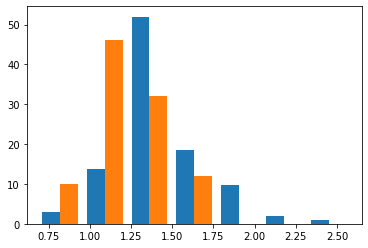

In [34]:
A = plt.hist(X,weights=wts,bins=7)

In [35]:
B = A[0][0]

In [36]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[2.941176470588235, 13.725490196078429, 51.96078431372539, 18.627450980392226, 12.745098039215733]


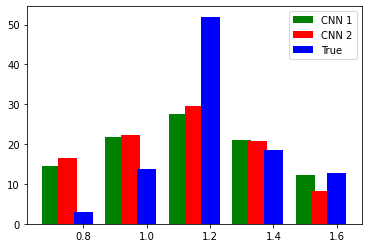

In [39]:
#Freq = [12.8, 23.2, 29.2, 18.4, 12.0, 0.8]
#Freq2 = [16.4, 22.2, 29.6, 20.8, 8., 0.2]
# Freq = [12.8, 23.2, 29.2, 18.4, 12.8] # average sample 4
# Freq2 = [16.4, 22.2, 29.6, 20.8, 8.2] # average sample 10
Freq = [14.4, 21.8, 27.6, 21.0, 12.2] # average sample 10
Freq2 = [16.4, 22.2, 29.6, 20.8, 8.2] # average sample 10
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
#labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]
xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])